In [13]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [14]:
import os
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import d3p
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import glob
import scipy.stats as stats
import itertools
from pprint import pprint
from scripts.constants import COLUMNS_FOR_DATASET
from src.utils.data_utils import transform_for_modeling
from scripts.constants import TEST_DATASETS_FOR_DATASET, TARGET_COLUMNS_FOR_DATASET
from src.napsu_mq.napsu_mq import NapsuMQModel, NapsuMQResult

In [15]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")
NEW_RESULTS_FOLDER = os.path.join(RESULTS_FOLDER, "new_ci_coverages")

In [16]:
ci_coverage_files = glob.glob(os.path.join(RESULTS_FOLDER, 'ci_coverage_napsu_independence_pruning_*.csv'))

In [17]:
pprint(ci_coverage_files)

['/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_education-num+sex.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_education-num+hours-per-week.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_80e_age+education-num.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_all.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_03e_education-num+sex.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_30e_none.csv',
 '/home/local/jarlehti/projects/gradu/results/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_03e_age+hours-per-week

In [18]:
df = pd.read_csv(ci_coverage_files[0])
df

,original_dataset_name,index,n_datasets,conf_int_range,conf_int_start,conf_int_end,conf_int_width,true_parameter_value,contains_true_parameter,missing_query,experiment_id,epsilon
0,adult_independence_pruning,0,100,0.05,0.066910,0.093592,0.026682,0.008048,False,education-num+sex,A7DYQ0I4,0.1
1,adult_independence_pruning,0,100,0.05,-0.149779,-0.145995,0.003784,-0.107231,False,education-num+sex,A7DYQ0I4,0.1
2,adult_independence_pruning,0,100,0.05,0.296285,0.334766,0.038481,0.082457,False,education-num+sex,A7DYQ0I4,0.1
3,adult_independence_pruning,0,100,0.05,0.933863,0.994584,0.060721,0.644892,False,education-num+sex,A7DYQ0I4,0.1
4,adult_independence_pruning,0,100,0.10,-0.013991,0.041909,0.055899,0.008048,True,education-num+sex,A7DYQ0I4,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
3795,adult_independence_pruning,49,100,0.90,0.149884,1.668187,1.518303,0.644892,True,education-num+sex,A7DYQ0I4,0.1
3796,adult_independence_pruning,49,100,0.95,-0.432062,0.489763,0.921824,0.008048,True,education-num+sex,A7DYQ0I4,0.1
3797,adult_independence_pruning,49,100,0.95,-0.210802,-0.070718,0.140084,-0.107231,True,education-num+sex,A7DYQ0I4,0.1
3798,adult_independence_pruning,49,100,0.95,-0.309918,0.925230,1.235149,0.082457,True,education-num+sex,A7DYQ0I4,0.1


In [19]:
df_combined = pd.DataFrame()

for file in sorted(ci_coverage_files):
    df = pd.read_csv(file)
    df_combined = df_combined.append(df)

/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df_combined.append(df)
/tmp/ipykernel_112327/3890474617.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

In [20]:
df_combined['parameter_index'] = df_combined.groupby(['true_parameter_value'], sort=False).ngroup() + 1

In [21]:
df_combined

,original_dataset_name,index,n_datasets,conf_int_range,conf_int_start,conf_int_end,conf_int_width,true_parameter_value,contains_true_parameter,missing_query,experiment_id,epsilon,parameter_index
0,adult_independence_pruning,0,100,0.05,-0.105486,-0.057569,0.047917,0.008048,False,age+compensation,PYQ6IL0P,0.1,1
1,adult_independence_pruning,0,100,0.05,-0.053235,-0.049226,0.004010,-0.107231,False,age+compensation,PYQ6IL0P,0.1,2
2,adult_independence_pruning,0,100,0.05,-0.527967,-0.493845,0.034123,0.082457,False,age+compensation,PYQ6IL0P,0.1,3
3,adult_independence_pruning,0,100,0.05,-0.091445,-0.039914,0.051531,0.644892,False,age+compensation,PYQ6IL0P,0.1,4
4,adult_independence_pruning,0,100,0.10,-0.149637,-0.062081,0.087555,0.008048,False,age+compensation,PYQ6IL0P,0.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,adult_independence_pruning,49,100,0.90,0.586223,0.727110,0.140888,0.644892,True,none,2WELYLDZ,8.0,4
3796,adult_independence_pruning,49,100,0.95,-0.055520,0.103562,0.159083,0.008048,True,none,2WELYLDZ,8.0,1
3797,adult_independence_pruning,49,100,0.95,-0.112661,-0.102983,0.009678,-0.107231,True,none,2WELYLDZ,8.0,2
3798,adult_independence_pruning,49,100,0.95,0.028355,0.133326,0.104971,0.082457,True,none,2WELYLDZ,8.0,3


In [22]:
dataset_name = "adult_independence_pruning"

train_df_path = os.path.join(CURRENT_FOLDER, f"data/datasets/{dataset_name}.csv")
train_df = pd.read_csv(train_df_path)

train_df_transformed = transform_for_modeling(dataset_name, train_df)

In [23]:
train_df_transformed

,age,education-num,sex,hours-per-week,compensation
0,"(16.927, 53.5]",13,Male,"(0.902, 50.0]",0
1,"(16.927, 53.5]",13,Male,"(0.902, 50.0]",0
2,"(16.927, 53.5]",9,Male,"(0.902, 50.0]",0
3,"(16.927, 53.5]",7,Male,"(0.902, 50.0]",0
4,"(16.927, 53.5]",13,Female,"(0.902, 50.0]",0
...,...,...,...,...,...
30157,"(16.927, 53.5]",12,Female,"(0.902, 50.0]",0
30158,"(16.927, 53.5]",9,Male,"(0.902, 50.0]",1
30159,"(53.5, 90.0]",9,Female,"(0.902, 50.0]",0
30160,"(16.927, 53.5]",9,Male,"(0.902, 50.0]",0


In [24]:
rng = jax.random.PRNGKey(42)
model = NapsuMQModel()

n, d = train_df_transformed.shape

meta = model.fit(
    data=train_df_transformed,
    dataset_name="adult_independence_pruning",
    rng=rng,
    epsilon=8,
    delta=(n ** (-2)),
    column_feature_set=[],
    use_laplace_approximation=True,
    laplace_approximation_algorithm="torch_LBFGS",
    dry_run=True,
    return_MST_weights=True
)

MST_weights = meta['MST_weights']

Domain size: 256
Recording:  Query selection
start MST selection
end MST selection
Recording:  Calculating full marginal query
MST query set: [('age', 'education-num'), ('education-num', 'compensation'), ('sex', 'compensation'), ('sex', 'hours-per-week')]
Full set of marginal queries: 72
Recording:  Calculating canonical query set
Calculating canonical queries, clique_set length: 10


  0%|                                                                                                                                                                 | 0/10 [00:00<?, ?it/s]
32it [00:00, 16118.38it/s]

4it [00:00, 3754.97it/s]

2it [00:00, 7127.11it/s]

2it [00:00, 6379.17it/s]

32it [00:00, 9873.31it/s]

4it [00:00, 7433.41it/s]

16it [00:00, 26122.56it/s]

2it [00:00, 4637.15it/s]

2it [00:00, 5645.09it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 111107.39it/s]


Calculating new queries, not_original_clique_queries length: 19


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 24215.06it/s]

Canonical queries: 51
Junction tree width: 1
(51,)
Number of marginal queries: 4


2.235812976641374
DP noise mean: 0.10167308204221397
[4.98992268e+01 6.96191874e+01 2.24267501e+02 1.07708506e+02
 1.86164387e+02 1.12123978e+02 4.28402228e+01 1.43488293e+03
 7.46636960e+02 1.27438239e+02 7.72707485e+01 5.67791238e+02
 2.74037302e+02 1.00277724e+02 9.79838986e+01 1.08782118e+02
 2.22094322e+02 3.32529742e+02 3.50721531e+02 6.34810334e+02
 9.26465998e+02 3.40405390e+02 8.40644532e+03 5.93717498e+03
 1.18004753e+03 9.29397954e+02 4.47355585e+03 1.34850967e+03
 4.41307601e+02 2.73409644e+02 8.27888669e+00 6.39596368e+03
 1.39838738e+04 9.51522197e+00 1.48989943e+01 3.47671661e+01
 2.62729716e+01 5.71256559e+01 5.96339336e+01 2.83683465e+01
 1.61721395e+03 1.34293559e+03 3.39008892e+02 2.55658646e+02
 2.12358638e+03 9.15461829e+02 4.03840360e+02 2.80076708e+02
 1.88766028e+00 2.94031342e+03 5.31903168e+02]
SUFF STAT MEANS
1205.686274509804
1205.787947591846
SUFF STAT VARIANCES
6207849.744713571
6206957.942634349


In [54]:
sorted_MST_weights = sorted(MST_weights.items(), key=lambda item: item[1], reverse=True)

In [55]:
sorted_MST_weights

[(('education-num', 'compensation'), 7466.736087982088),
 (('sex', 'compensation'), 5297.484497762226),
 (('sex', 'hours-per-week'), 2390.022686120228),
 (('hours-per-week', 'compensation'), 2339.9716342786496),
 (('age', 'education-num'), 1980.8778957661486),
 (('education-num', 'sex'), 1886.6021460581642),
 (('education-num', 'hours-per-week'), 1575.605938137042),
 (('age', 'compensation'), 1104.7671293712733),
 (('age', 'sex'), 521.0094683525108),
 (('age', 'hours-per-week'), 211.91487950849086)]

In [26]:
sorted_MST_weights
sorted_unique_queries = ["all"] + ["+".join(sorted(item[0])) for item in sorted_MST_weights] + ["none"]
print(sorted_unique_queries)

['all', 'compensation+education-num', 'compensation+sex', 'hours-per-week+sex', 'compensation+hours-per-week', 'age+education-num', 'education-num+sex', 'education-num+hours-per-week', 'age+compensation', 'age+sex', 'age+hours-per-week', 'none']


KeyboardInterrupt: 

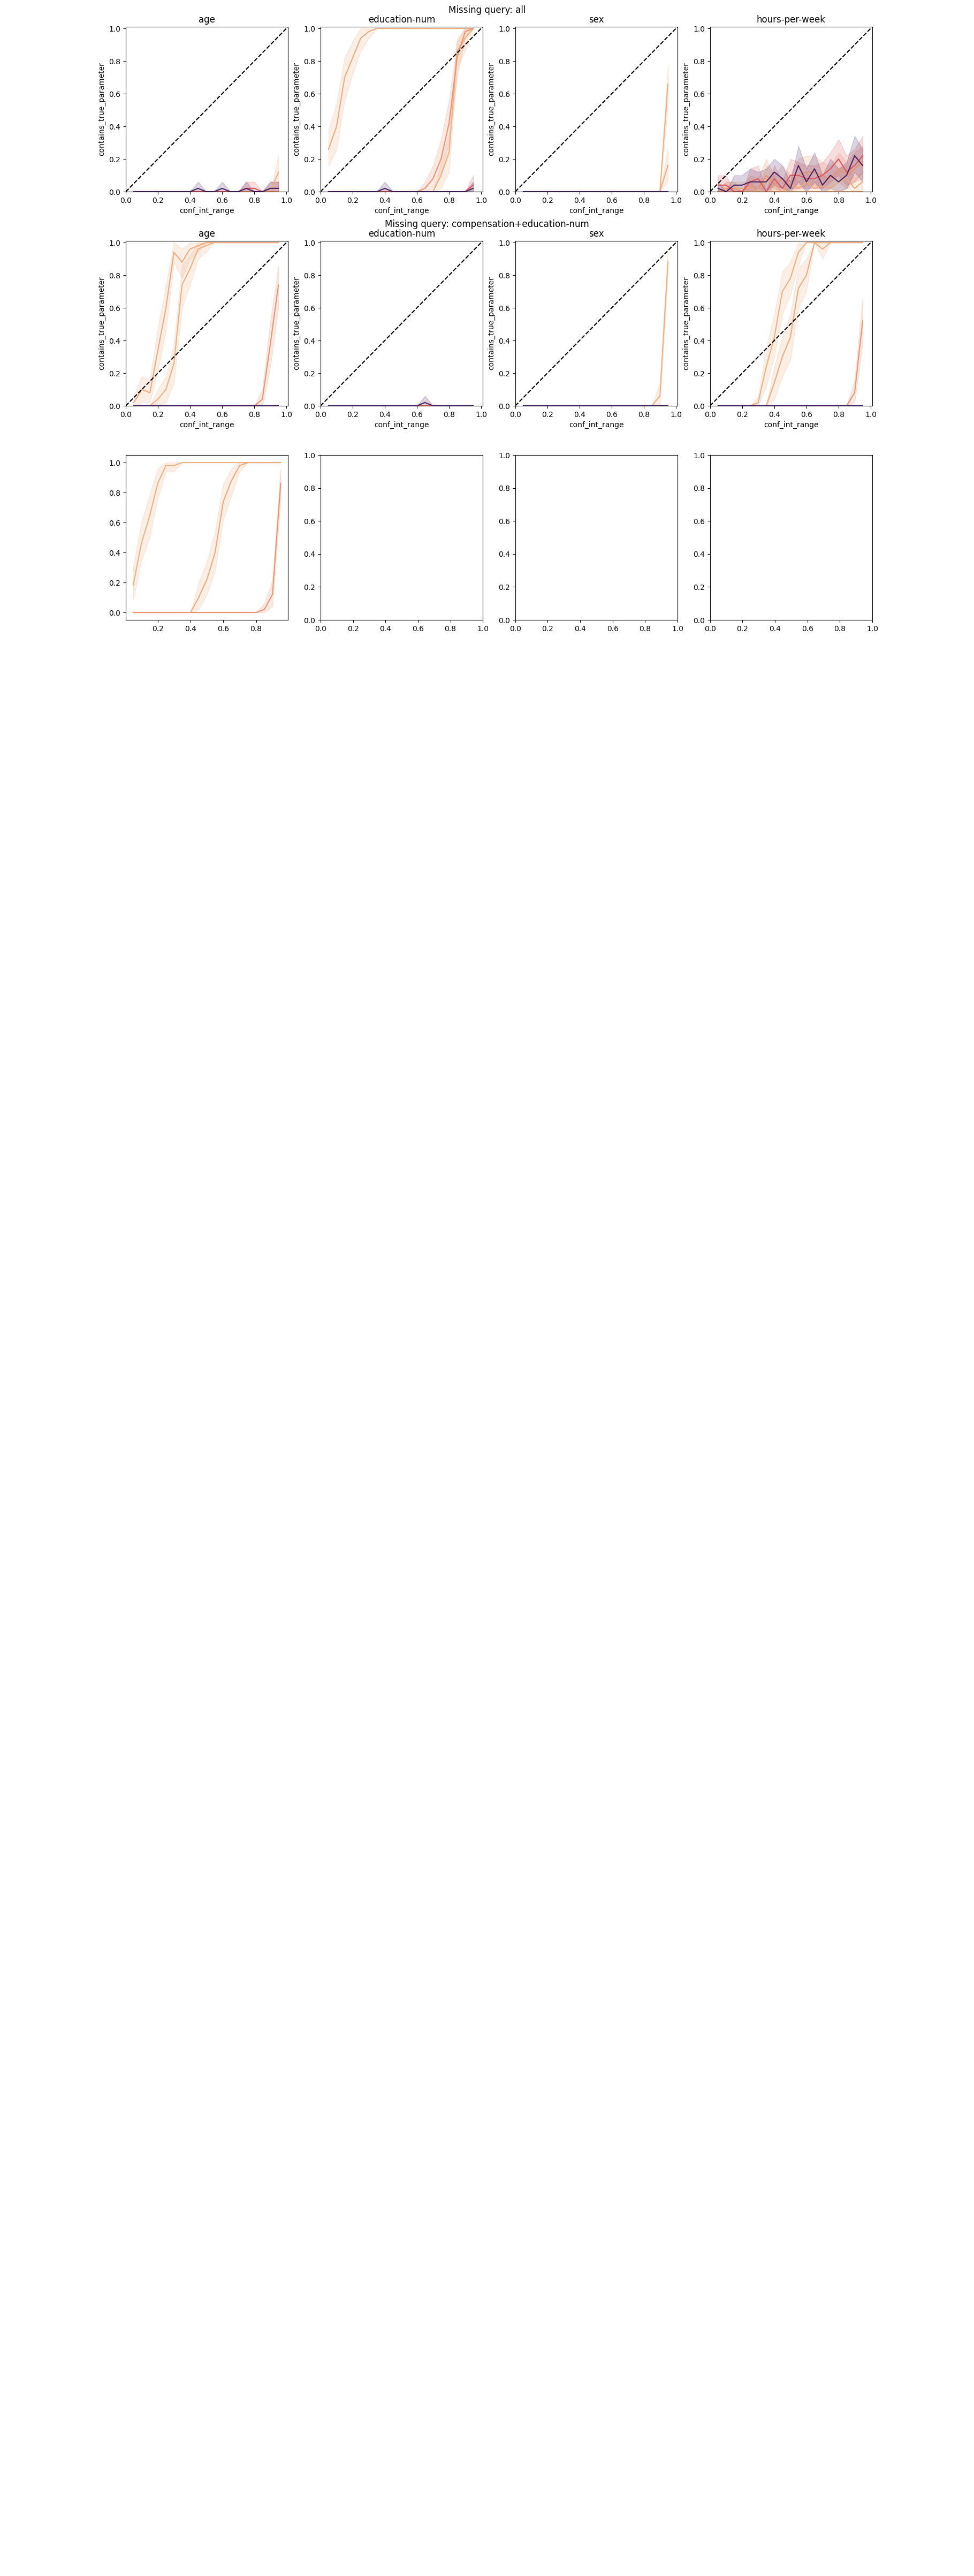

In [27]:
original_dataset_name = df_combined['original_dataset_name'].iloc[0]
dims = len(COLUMNS_FOR_DATASET[original_dataset_name])

unique_queries = list(df_combined['missing_query'].unique())
n_unique_queries = len(unique_queries)

columns = train_df.columns

fig = plt.figure(figsize=((2+4*(dims-1)), n_unique_queries*4))

lines = []
labels = [0.1, 0.3, 1.0, 3.0, 8.0]

subfigs = fig.subfigures(nrows=n_unique_queries, ncols=1)

for row, subfig in enumerate(subfigs):
    missing_query = sorted_unique_queries[row]
        
    df = df_combined[df_combined['missing_query'] == missing_query]
    
    axs = subfig.subplots(nrows=1, ncols=dims-1)
    
    for col, ax in enumerate(axs):
        param_index = col+1
        param_df = df[df['parameter_index'] == param_index]
        g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", hue="epsilon", data=param_df, ax=ax, palette="flare", legend=None)
        diag = (0.0, 1.01)
        ax.plot(diag, diag, linestyle="dashed", color="black")
        ax.set_xlim(diag)
        ax.set_ylim(diag)
        ax.set_title(f"{columns[param_index-1]}")
        lines.extend(g.lines)

    subfig.suptitle(f"Missing query: {missing_query}")
    #subfig.savefig(os.path.join(PLOTS_FOLDER, f"independence_pruning_ci_coverage_{missing_query}.pdf"))

#fig.subplots_adjust(wspace=0.4, hspace=0.3)
fig.legend(lines, labels, bbox_to_anchor=(0, 1.01, 1, 0.1), loc="lower center", borderaxespad=0, ncol=5, title="epsilon")
plt.show()

In [ ]:
#fig.savefig(os.path.join(PLOTS_FOLDER, "independence_pruning_ci_coverage.pdf"), bbox_inches='tight')

In [28]:
new_ci_coverage_files = glob.glob(os.path.join(NEW_RESULTS_FOLDER, 'ci_coverage_napsu_independence_pruning_*.csv'))

In [29]:
new_ci_coverage_files

['/home/local/jarlehti/projects/gradu/results/new_ci_coverages/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_education-num+hours-per-week.csv',
 '/home/local/jarlehti/projects/gradu/results/new_ci_coverages/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_01e_all.csv',
 '/home/local/jarlehti/projects/gradu/results/new_ci_coverages/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_03e_education-num+sex.csv',
 '/home/local/jarlehti/projects/gradu/results/new_ci_coverages/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_03e_age+hours-per-week.csv',
 '/home/local/jarlehti/projects/gradu/results/new_ci_coverages/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_10e_age+education-num.csv',
 '/home/local/jarlehti/projects/gradu/results/new_ci_coverages/ci_coverage_napsu_independence_pruning_model_adult_independence_pruning_03e_all.csv',
 '/home/local/jarlehti/projects/gradu/

In [30]:
new_df_combined = pd.DataFrame()

for file in sorted(new_ci_coverage_files):
    df = pd.read_csv(file)
    new_df_combined = new_df_combined.append(df)

/tmp/ipykernel_112327/3082554329.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_combined = new_df_combined.append(df)
/tmp/ipykernel_112327/3082554329.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_combined = new_df_combined.append(df)
/tmp/ipykernel_112327/3082554329.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_combined = new_df_combined.append(df)
/tmp/ipykernel_112327/3082554329.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df_combined = new_df_combined.append(df)
/tmp/ipykernel_112327/3082554329.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

In [31]:
new_df_combined['parameter_index'] = new_df_combined.groupby(['true_parameter_value'], sort=False).ngroup() + 1

In [ ]:
original_dataset_name = new_df_combined['original_dataset_name'].iloc[0]
dims = len(COLUMNS_FOR_DATASET[original_dataset_name])

unique_queries = list(new_df_combined['missing_query'].unique())
n_unique_queries = len(unique_queries)

columns = train_df.columns

fig = plt.figure(figsize=((2+4*(dims-1)), n_unique_queries*4))

lines = []
labels = [0.1, 0.3, 1.0, 3.0, 8.0]

subfigs = fig.subfigures(nrows=n_unique_queries, ncols=1)

for row, subfig in enumerate(subfigs):
    missing_query = sorted_unique_queries[row]
        
    df = new_df_combined[new_df_combined['missing_query'] == missing_query]
    
    if len(df) == 0:
        continue
    
    axs = subfig.subplots(nrows=1, ncols=dims-1)
    
    for col, ax in enumerate(axs):
        param_index = col+1
        param_df = df[df['parameter_index'] == param_index]
        g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", hue="epsilon", data=param_df, ax=ax, palette="flare", legend=None)
        diag = (0.0, 1.01)
        ax.plot(diag, diag, linestyle="dashed", color="black")
        ax.set_xlim(diag)
        ax.set_ylim(diag)
        ax.set_title(f"{columns[param_index-1]}")
        lines.extend(g.lines)

    subfig.suptitle(f"Missing query: {missing_query}")
    #subfig.savefig(os.path.join(PLOTS_FOLDER, f"independence_pruning_ci_coverage_{missing_query}.pdf"))

#fig.subplots_adjust(wspace=0.4, hspace=0.3)
fig.legend(lines, labels, bbox_to_anchor=(0, 1.01, 1, 0.1), loc="lower center", borderaxespad=0, ncol=5, title="epsilon")
plt.show()

12


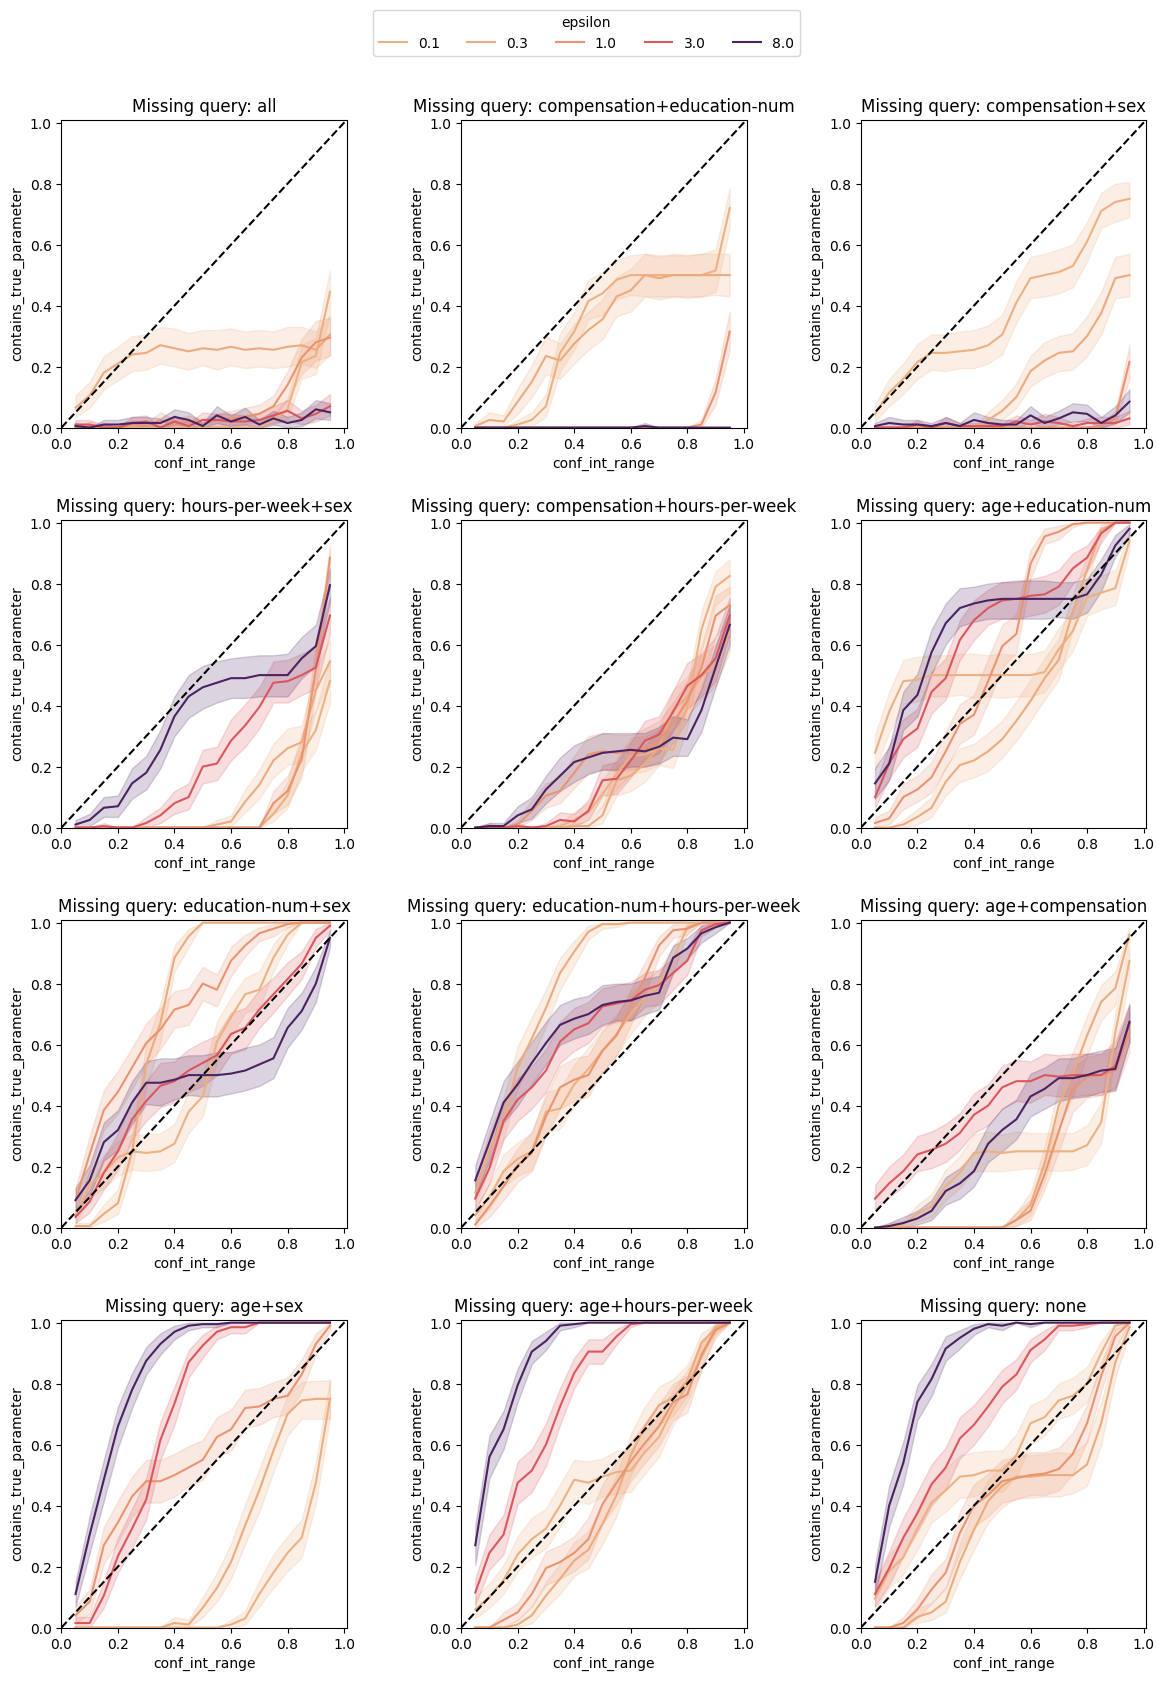

In [40]:
original_dataset_name = df_combined['original_dataset_name'].iloc[0]
dims = 3
unique_queries = list(df_combined['missing_query'].unique())

print(len(unique_queries))
n_unique_queries = int(np.ceil(len(unique_queries) / dims))

columns = train_df.columns

fig = plt.figure(figsize=((2+4*(dims)), n_unique_queries*4))

lines = []
labels = [0.1, 0.3, 1.0, 3.0, 8.0]

subfigs = fig.subfigures(nrows=n_unique_queries, ncols=1)

for row, subfig in enumerate(subfigs):
    
    axs = subfig.subplots(nrows=1, ncols=dims)
    
    for col, ax in enumerate(axs):
    
        missing_query = sorted_unique_queries[dims*row+col]

        df = df_combined[df_combined['missing_query'] == missing_query]

        g = sns.lineplot(x="conf_int_range", y="contains_true_parameter", markers=True, err_style="band", hue="epsilon", data=df, ax=ax, palette="flare", legend=None)
        diag = (0.0, 1.01)
        ax.plot(diag, diag, linestyle="dashed", color="black")
        ax.set_xlim(diag)
        ax.set_ylim(diag)
        ax.set_title(f"Missing query: {missing_query}")
        lines.extend(g.lines)

        #subfig.suptitle(f"Missing query: {missing_query}")
        #subfig.savefig(os.path.join(PLOTS_FOLDER, f"independence_pruning_ci_coverage_{missing_query}.pdf"))

fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.legend(lines, labels, bbox_to_anchor=(0, 1.01, 1, 0.1), loc="lower center", borderaxespad=0, ncol=5, title="epsilon")
plt.show()

In [53]:
fig.savefig(os.path.join(PLOTS_FOLDER, "independence_pruning_ci_coverage_tight.pdf"), bbox_inches='tight')